Вычислительное Д/З по случайным процессам № 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
import random



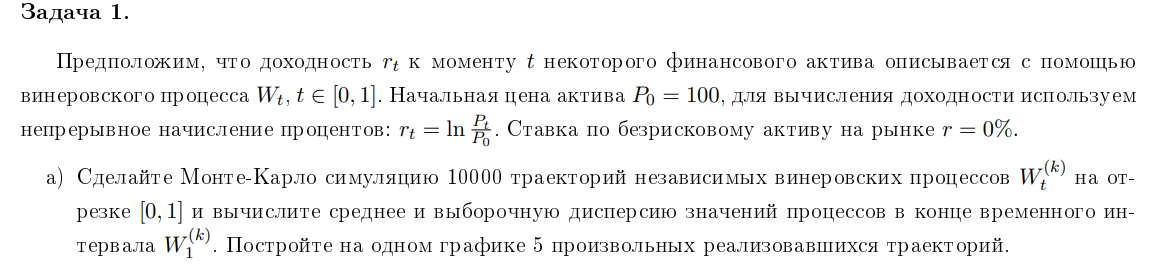

Среднее значение доходности r_t в конце интервала: 0.010448623789417305
Дисперсия доходности r_t в конце интервала: 0.9830657088475742


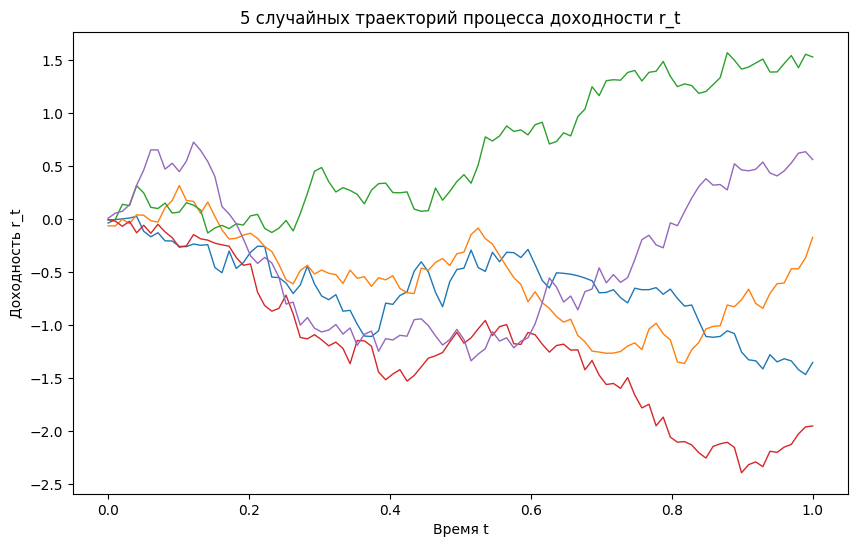

In [2]:
# Параметры задачи
P0 = 100  # Начальная цена актива
r = 0.0   # Ставка по безрисковому активу
T = 1.0   # Временной интервал
num_steps = 100  # Количество шагов
num_simulations = 10000  # Количество симуляций
dt = T / num_steps

# Генерация траекторий винеровского процесса
dW = np.sqrt(dt) * np.random.randn(num_simulations, num_steps)
W = np.cumsum(dW, axis=1)  # Винеровский процесс

# Доходность как функция винеровского процесса
r_t = W[:, -1]

# Среднее и дисперсия доходности в конце временного интервала
mean_r_t = np.mean(r_t)
var_r_t = np.var(r_t)

print("Среднее значение доходности r_t в конце интервала:", mean_r_t)
print("Дисперсия доходности r_t в конце интервала:", var_r_t)

# Построение графика 5 случайных траекторий
plt.figure(figsize=(10, 6))
for i in np.random.choice(range(num_simulations), size=5, replace=False):
    plt.plot(np.linspace(0, T, num_steps), W[i], lw=1)
plt.title("5 случайных траекторий процесса доходности r_t")
plt.xlabel("Время t")
plt.ylabel("Доходность r_t")
plt.show()


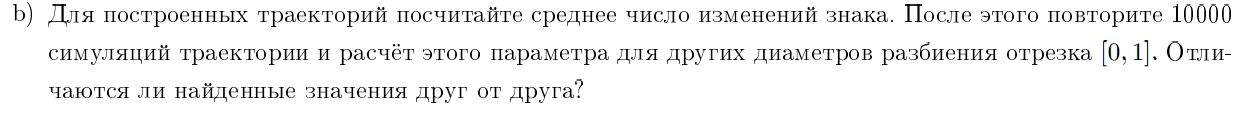

In [3]:
# Функция для подсчета числа изменений знака в траектории
def count_sign_changes(trajectory):
    return np.sum(np.diff(np.sign(trajectory)) != 0)

# Шаги разбиения
step_sizes = [10, 50, 100, 500, 1000]  
sign_changes_results = []

# Расчет среднего числа изменений знака для каждой траектории с шагами 10, 50, 100, 500, 1000
for num_steps in step_sizes:
    dt = T / num_steps
    sign_changes = []

    for _ in range(num_simulations):
        r = np.zeros(num_steps + 1)
        for i in range(1, num_steps + 1):
            dW = np.sqrt(dt) * np.random.randn()
            r[i] = r[i - 1] + dW

        # Подсчет числа изменений знака для траектории r
        sign_changes.append(count_sign_changes(r))

    # Среднее число изменений знака для заданного разбиения
    mean_sign_changes = np.mean(sign_changes)
    sign_changes_results.append((num_steps, mean_sign_changes))

# Вывод результатов первого расчета
print("Результаты для первого расчета:")
for steps, avg_changes in sign_changes_results:
    print(f"Число шагов: {steps}, Среднее число изменений знака: {avg_changes}")

# Второй набор 10000 симуляций с различными шагами разбиения
new_sign_changes_results = []

for num_steps in step_sizes:
    dt = T / num_steps
    sign_changes = []
# заново генерируем траектории
    for _ in range(num_simulations):
        r = np.zeros(num_steps + 1)
        for i in range(1, num_steps + 1):
            dW = np.sqrt(dt) * np.random.randn()
            r[i] = r[i - 1] + dW

        sign_changes.append(count_sign_changes(r))

    mean_sign_changes = np.mean(sign_changes)
    new_sign_changes_results.append((num_steps, mean_sign_changes))

# Вывод результатов второго расчета и сравнение
print("\nРезультаты для второго расчета:")
for steps, avg_changes in new_sign_changes_results:
    print(f"Число шагов: {steps}, Среднее число изменений знака: {avg_changes}")


Результаты для первого расчета:
Число шагов: 10, Среднее число изменений знака: 2.3642
Число шагов: 50, Среднее число изменений знака: 4.8015
Число шагов: 100, Среднее число изменений знака: 6.6772
Число шагов: 500, Среднее число изменений знака: 14.6534
Число шагов: 1000, Среднее число изменений знака: 20.4942

Результаты для второго расчета:
Число шагов: 10, Среднее число изменений знака: 2.3609
Число шагов: 50, Среднее число изменений знака: 4.7891
Число шагов: 100, Среднее число изменений знака: 6.6789
Число шагов: 500, Среднее число изменений знака: 14.4847
Число шагов: 1000, Среднее число изменений знака: 20.6396


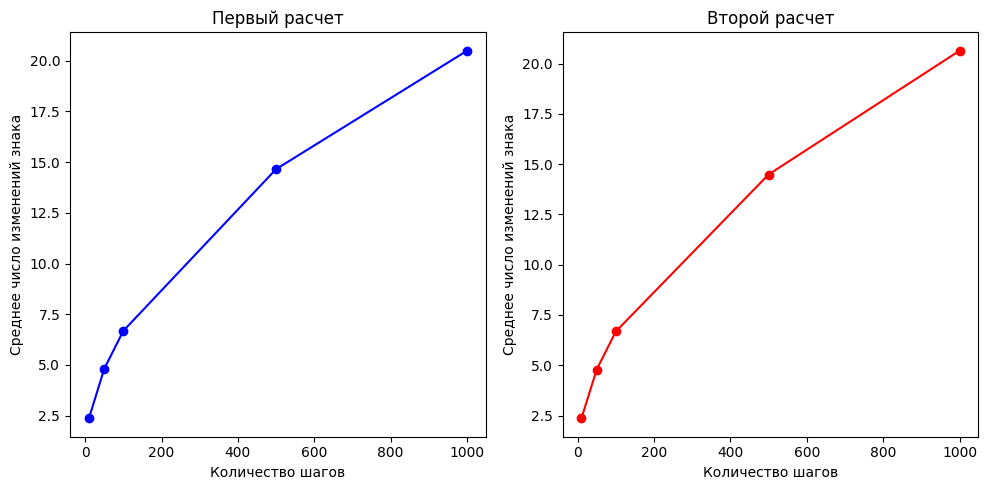

In [4]:
first_results = [result[1] for result in sign_changes_results]
second_results = [result[1] for result in new_sign_changes_results]
# Построение графиков
plt.figure(figsize=(10, 5))

# Первый график
plt.subplot(1, 2, 1)
plt.plot(step_sizes, first_results, marker='o', color='b', label="Первый расчет")
plt.xlabel("Количество шагов")
plt.ylabel("Среднее число изменений знака")
plt.title("Первый расчет")

# Второй график
plt.subplot(1, 2, 2)
plt.plot(step_sizes, second_results, marker='o', color='r', label="Второй расчет")
plt.xlabel("Количество шагов")
plt.ylabel("Среднее число изменений знака")
plt.title("Второй расчет")

plt.tight_layout()
plt.show()

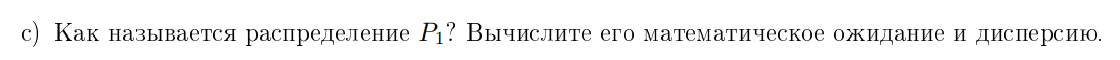


1. Так как доходность $r_t$ описывается винеровским процессом $W_t$ на интервале [0, 1], можно записать:
   $$
   r_t = W_t, \quad W_t \sim \mathcal{N}(0, t).
   $$
   Поскольку $ r_t = \ln\left(\frac{P_t}{P_0}\right) $, то можно выразить $ P_t $ через начальную цену $ P_0 $ и экспоненциальный рост:
   $ P_t = P_0 \cdot e^{W_t} $ .
   Следовательно, $$ P_1 = P_0 \cdot e^{W_1} $$ где $ W_1 \sim \mathcal{N}(0, 1)$ , что означает, что \( P_1 \) имеет *логнормальное распределение* .

2. Математическое ожидание $ P_1 $: 
   $$
   \mathbb{E}[P_1] = \mathbb{E}[P_0 \cdot e^{W_1}] = P_0 \cdot \mathbb{E}[e^{W_1}] = P_0 \cdot e^{\frac{\sigma^2}{2}}
   $$

3. Дисперсия $ P_1 $:
   $$
   \text{Var}(P_1) = \text{Var}(P_0 \cdot e^{W_1}) = P_0^2 \cdot \left(e^{\sigma^2} - 1\right) \cdot e^{\sigma^2}$$



In [5]:

sigma = 1

# Теоретическое математическое ожидание и дисперсия для P_1
expected_P1 = P0 * np.exp(sigma / 2)
variance_P1 = (P0 ** 2) * np.exp(sigma) * (np.exp(sigma) - 1)

print(f"Теоретическое математическое ожидание P_1: {expected_P1}")
print(f"Теоретическая дисперсия P_1: {variance_P1}")


Теоретическое математическое ожидание P_1: 164.87212707001282
Теоретическая дисперсия P_1: 46707.742704716045


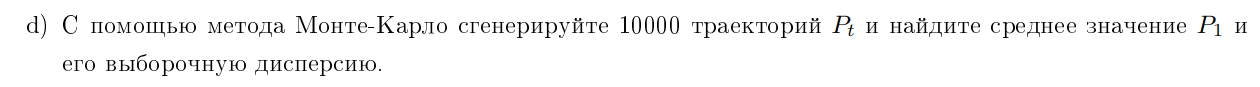

In [6]:

# Параметры задачи
num_simulations = 10000  # Количество траекторий
num_steps = 1000         # Количество шагов на интервале [0, 1]

# Симуляция винеровского процесса для r_t
r = np.zeros((num_simulations, num_steps + 1))
for i in range(1, num_steps + 1):
    dW = np.sqrt(dt) * np.random.randn(num_simulations)
    r[:, i] = r[:, i - 1] + dW  # Модель изменения r_t как винеровского процесса

# Рассчитываем цены P_t, используя начальную цену и экспоненциальный рост
P = P0 * np.exp(r)

# Значения P_1 для каждой траектории
P_1 = P[:, -1]

# Вычисление выборочного среднего и выборочной дисперсии для P_1
mean_P1 = np.mean(P_1)
var_P1 = np.var(P_1)
print(f"Выборочное среднее P_1: {mean_P1}")
print(f"Выборочная дисперсия P_1: {var_P1}")


Выборочное среднее P_1: 168.9953005482982
Выборочная дисперсия P_1: 47906.40525427106


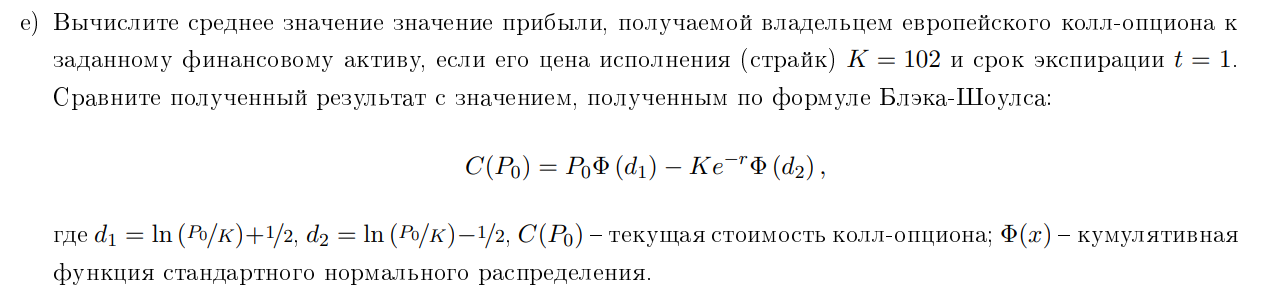


1. **Метод Монте-Карло:**

Сначала симулируем возможные значения цены актива $ P_1$ к моменту $t = 1 $ с использованием модели геометрического броуновского движения:

$$ P_1 = P_0 \cdot e^{W_1} $$

Прибыль по колл-опциону в каждой симуляции рассчитывается как:
$
\text{Payoff} = \max(P_1 - K, 0),
$
где $K = 102$— страйк опциона.


2. **Формула Блэка-Шоулза:**

Стоимость колл-опциона по формуле Блэка-Шоулза выражается как:

$C(P_0) = P_0 \Phi(d_1) - K e^{-r T} \Phi(d_2)$
где $\Phi(x) $ — кумулятивная функция распределения стандартного нормального распределения, а $d_1$ и $d_2$ можно выразить как:

$$
d_1 = \frac{\ln\left(\frac{P_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}$$
$$
d_2 = d_1 - \sigma \sqrt{T}
$$

In [7]:
K = 102
t = 1
# Вычисление цены актива через экспоненциальный процесс
# W_t - случайная величина (например, нормальное распределение)
W_t = np.random.normal(0, np.sqrt(t), 10000)  # для Монте-Карло
P1 = P0 * np.exp(W_t)

# Прибыль по колл-опциону для каждой симуляции
payoffs = np.maximum(P1 - K, 0)

# Средняя прибыль от колл-опциона (метод Монте-Карло)
mean_profit = np.mean(payoffs)
print(f"Средняя прибыль от колл-опциона (Монте-Карло): {mean_profit}")

# Вычисление цены колл-опциона по формуле Блэка-Шоулза
d1 = (np.log(P0 / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
d2 = d1 - sigma * np.sqrt(t)
C_black_scholes = P0 * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)

print(f"Цена колл-опциона по формуле Блэка-Шоулза: {C_black_scholes}")

Средняя прибыль от колл-опциона (Монте-Карло): 87.67088767946117
Цена колл-опциона по формуле Блэка-Шоулза: [[37.68238871 36.74111434 36.197539   ... 66.23269975 64.6643012
  64.87452166]
 [37.68238871 37.38443887 37.06263619 ... 27.81891976 27.90781064
  28.11955625]
 [37.68238871 37.92616151 36.82243428 ... 20.84844782 21.76263857
  21.93769205]
 ...
 [37.68238871 38.45246828 38.5941959  ... 19.44322707 19.33196525
  19.24486674]
 [37.68238871 38.18744309 37.54895398 ... 20.35569129 21.00070385
  20.9964235 ]
 [37.68238871 37.68748958 38.49519408 ... 55.05119201 53.99420159
  54.03829416]]


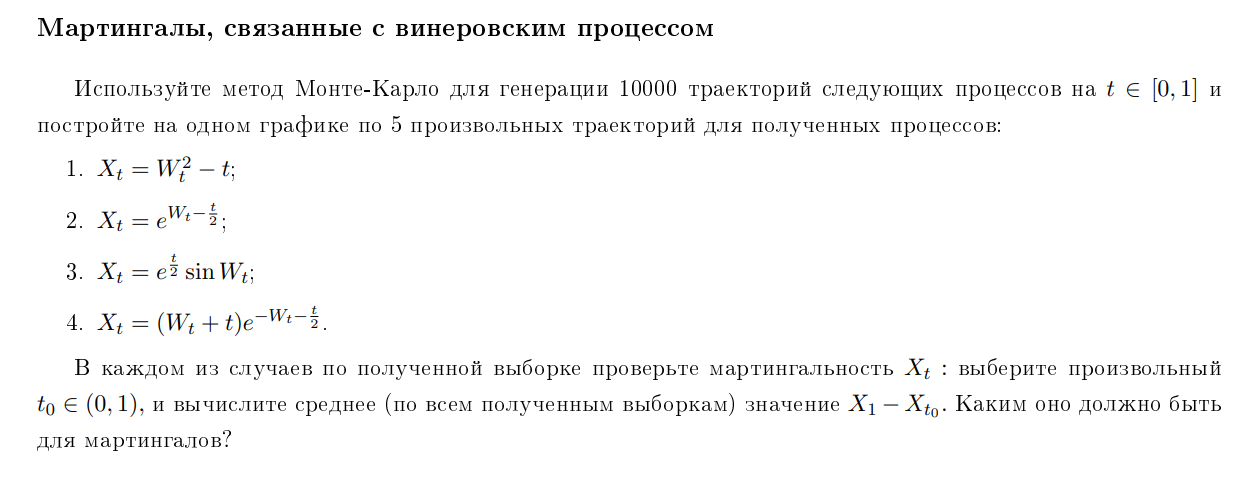

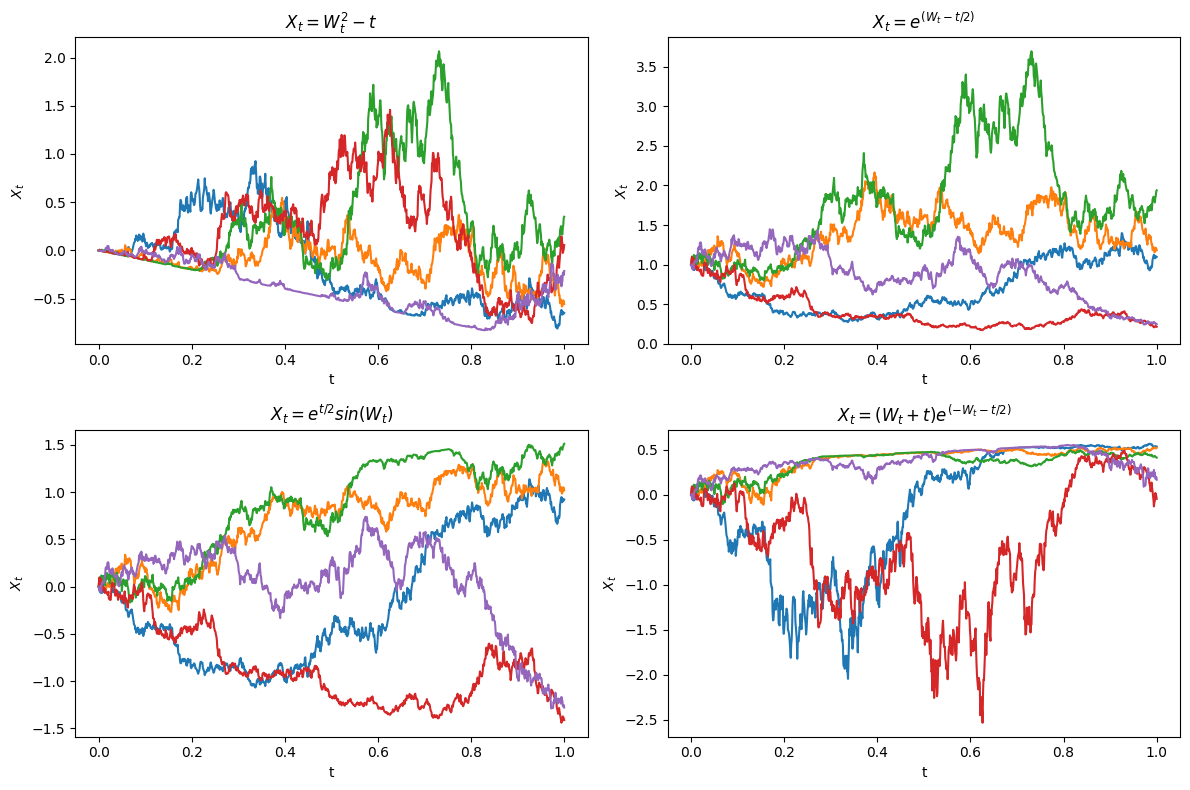

In [8]:
# Параметры моделирования
num_simulations = 10000  # Количество траекторий
num_steps = 1000         # Количество шагов на интервале [0, 1]
T = 1                    # Конечное время
dt = T / num_steps       # Длина временного шага
t = np.linspace(0, T, num_steps + 1)  # Шаги времени

# Генерация винеровского процесса
W = np.cumsum(np.sqrt(dt) * np.random.randn(num_simulations, num_steps), axis=1)
W = np.concatenate((np.zeros((num_simulations, 1)), W), axis=1)  # добавляем начальное условие W(0) = 0

# Определение 4 процессов
X1 = W**2 - t
X2 = np.exp(W - t / 2)
X3 = np.exp(t / 2) * np.sin(W)
X4 = (W + t) * np.exp(-W - t / 2)

# Выбор 5 случайных траекторий для каждого процесса
random_indices = np.random.choice(num_simulations, 5, replace=False)

# Построение графиков
plt.figure(figsize=(12, 8))

# График для X1
plt.subplot(2, 2, 1)
for idx in random_indices:
    plt.plot(t, X1[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = W_t^2 - t$')

# График для X2
plt.subplot(2, 2, 2)
for idx in random_indices:
    plt.plot(t, X2[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = e^{(W_t - t/2)}$')

# График для X3
plt.subplot(2, 2, 3)
for idx in random_indices:
    plt.plot(t, X3[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = e^{t/2}sin(W_t)$')

# График для X4
plt.subplot(2, 2, 4)
for idx in random_indices:
    plt.plot(t, X4[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = (W_t + t) e^{(-W_t - t/2)}$')

plt.tight_layout()
plt.show();


Для проверки мартингальности процесса $X_t$, нужно проверить условие, что:
$$\mathbb{E}[X_1 - X_{t_0}] = 0$$
где $t_0 \in (0, 1) $ — случайно выбранный момент времени.

Процесс $ X_t $ называется мартингалом, если для любого $t_0 $ и $ t_1 $, таких что $ 0 \leq t_0 < t_1 $, выполняется:
$$
\mathbb{E}[X_{t_1} \mid \mathcal{F}_{t_0}] = X_{t_0}$$
где $\mathcal{F}_{t_0}$ — фильтрация, которая соответствует всем событиям, произошедшим до времени $t_0 $. В случае с методом Монте-Карло мы можем проверить мартингальность через вычисление разницы $ X_1 - X_{t_0}$ для случайного момента времени $ t_0 $.

## Проверка мартингальности

$
\text{Среднее значение для } X_1 - X_{t_0} \text{ для процесса } X1: \mathbb{E}[X_1 - X_{t_0}] \approx 0
$

Если значение близко к нулю (с точностью до заданного допуска), процесс можно считать мартингалом. В противном случае процесс не является мартингалом.



In [9]:
# Функция для расчета мартингальности
def calculate_martingality(X, t0_idx):
    X_t0 = X[:, t0_idx]  # Значение процесса в момент времени t0
    X_1 = X[:, -1]       # Конечное значение процесса
    mean_difference = np.mean(X_1 - X_t0)
    return mean_difference

t0_idx = np.random.randint(1, num_steps)  # Случайный индекс времени t0

# Вычисление среднего для каждого процесса и сохранение результатов
results = []
for X in [X1, X2, X3, X4]:
    mean_diff = calculate_martingality(X, t0_idx)
    results.append(mean_diff)

# Вывод результатов
for i, mean_diff in enumerate(results, 1):
    print(f"Среднее значение X1 - Xt0 для процесса {i}: {mean_diff}")

Среднее значение X1 - Xt0 для процесса 1: 0.0011707527956045809
Среднее значение X1 - Xt0 для процесса 2: 0.01487884485875189
Среднее значение X1 - Xt0 для процесса 3: 0.011126340639585577
Среднее значение X1 - Xt0 для процесса 4: 0.021480284653440505


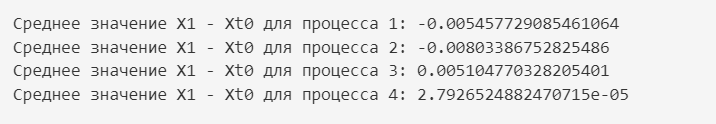 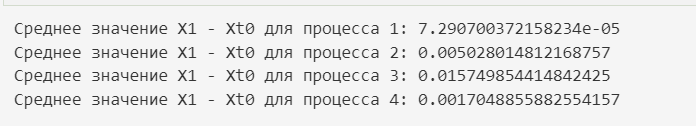 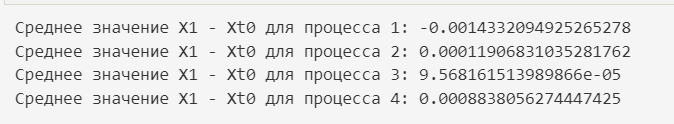 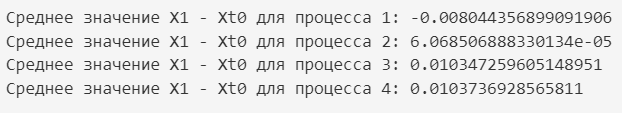


   За все попытки генерации $t_0$ у всех $X_t$ возникали слишком большие по модулю значения. Так что предполагаю, что  эти $X_t$ не являются мартингалами. Но вообще, все сильно зависит, от того, какие случайные приращения нагенерит компьютер.

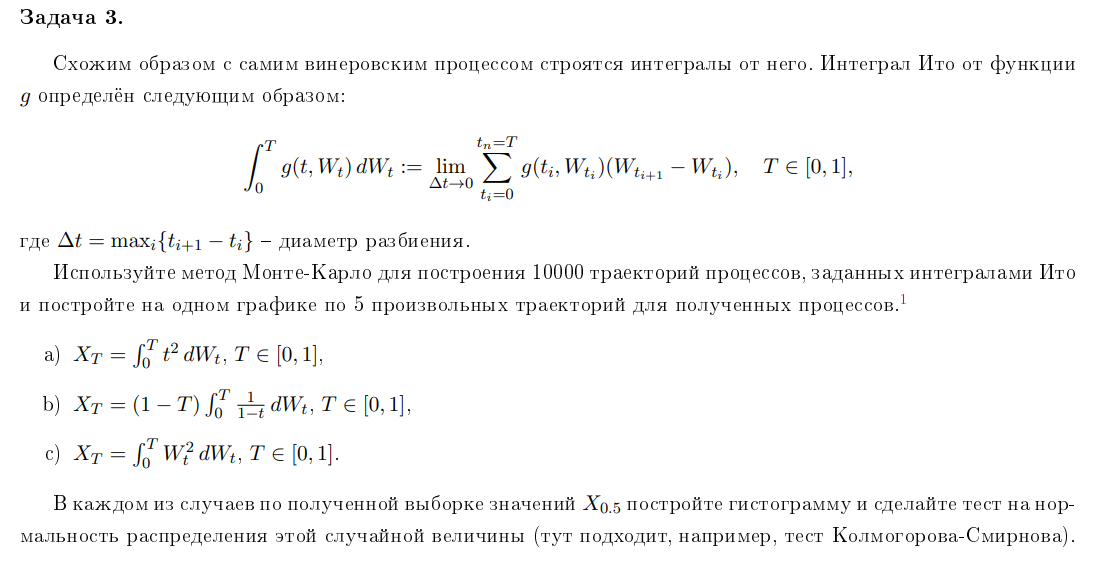

In [10]:
# Параметры
num_paths = 10000    # Количество траекторий для метода Монте-Карло
num_steps = 100      # Количество временных шагов
T = 1.0              # Конечное время
dt = T / num_steps   # Шаг по времени
dW = np.sqrt(dt) * np.random.randn(num_paths, num_steps)  # Инкременты винеровского процесса
W = np.cumsum(dW, axis=1)  # Накопленная сумма для получения W(t) на каждом шаге
W = np.hstack((np.zeros((num_paths, 1)), W))  # Добавляем W(0) = 0 в начало
# Создание временной сетки
t = np.linspace(0, T, num_steps + 1)


In [11]:
# Функция для аппроксимации интеграла Ито как кумулятивного процесса
def ito_integral_process(f, W):
    # Вычисляем интеграл Ито для каждой траектории, возвращая кумулятивную сумму
    integrands = f(t[:-1], W[:, :-1]) * (W[:, 1:] - W[:, :-1])  # Подынтегральная функция * инкременты W
    return np.cumsum(integrands, axis=1)  # Кумулятивная сумма для получения значений интеграла на каждом шаге

# (a) Вычисляем X_t = ∫_0^t τ^2 dW_τ как процесс
Xt_a_process = ito_integral_process(lambda t, W: t**2, W)

# (b) Вычисляем X_t = (1 - t) ∫_0^t 1/(1 - τ) dW_τ как процесс
Xt_b_process = (1 - t[:-1]) * ito_integral_process(lambda t, W: 1 / (1 - t), W)

# (c) Вычисляем X_t = ∫_0^t W_τ^2 dW_τ как процесс
Xt_c_process = ito_integral_process(lambda t, W: W**2, W)

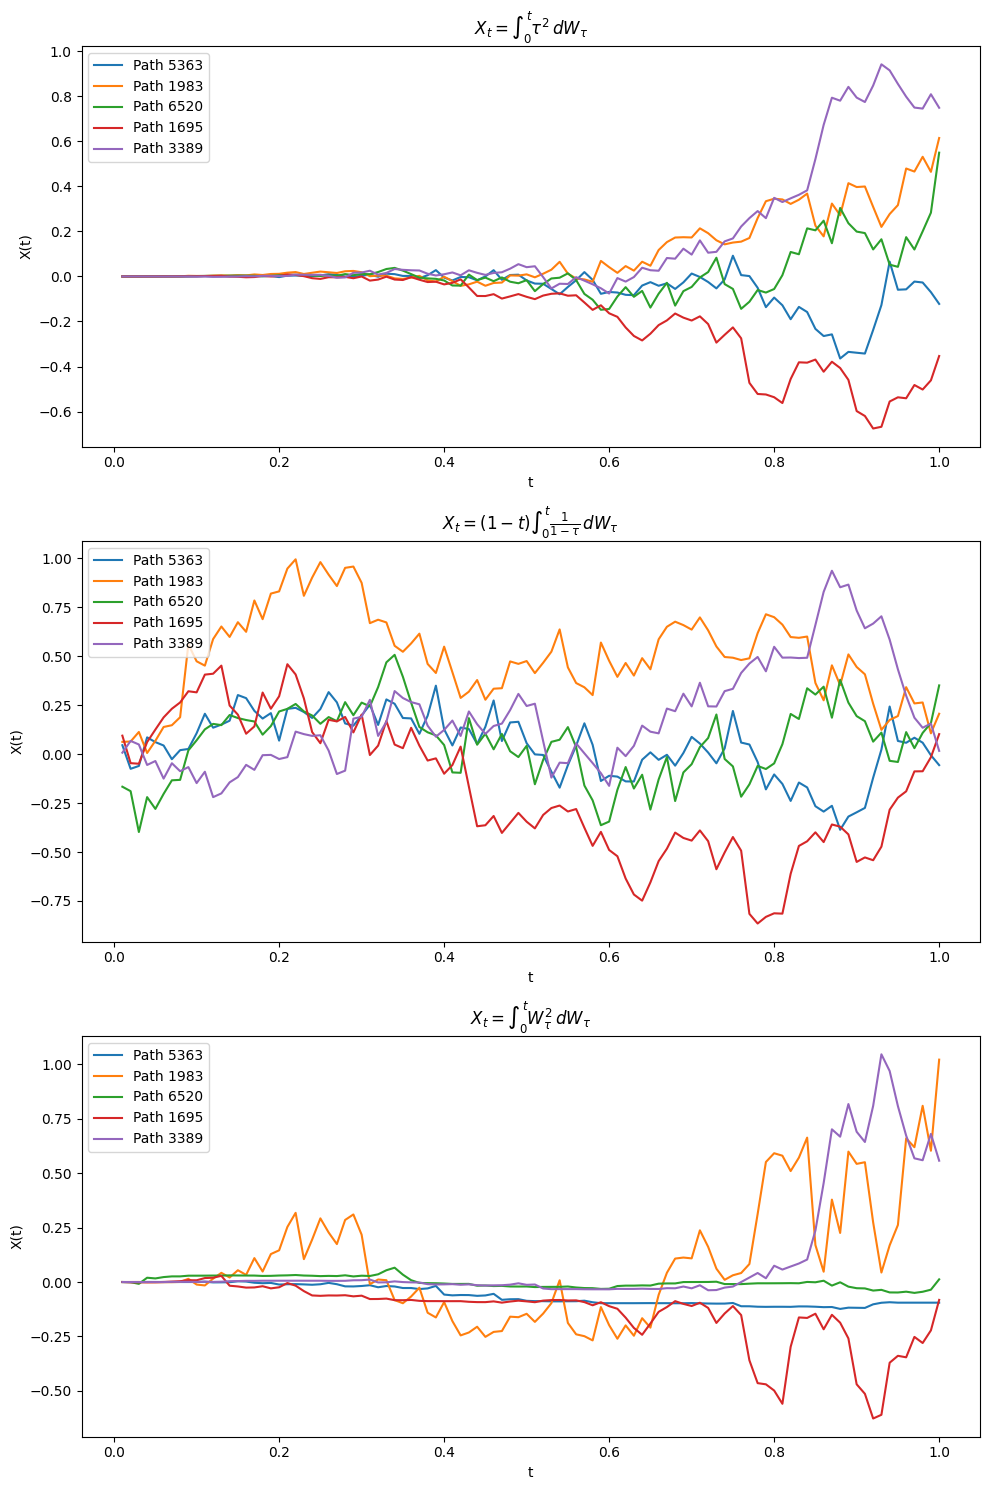

In [12]:
# Построение графиков траекторий для каждого процесса
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sample_paths = np.random.choice(num_paths, 5, replace=False)  # Выбираем 5 случайных траекторий

# Для каждой формулы (a), (b), и (c) отображаем 5 траекторий процесса X_t
for idx, Xt_process, title in zip(range(3), [Xt_a_process, Xt_b_process, Xt_c_process],
                                  ["$X_t = \\int_0^t \\tau^2 \\, dW_\\tau$",
                                   "$X_t = (1 - t) \\int_0^t \\frac{1}{1 - \\tau} \\, dW_\\tau$",
                                   "$X_t = \\int_0^t W_\\tau^2 \\, dW_\\tau$"]):
    for path in sample_paths:
        axs[idx].plot(t[1:], Xt_process[path], label=f"Path {path}")  # Строим траекторию
    axs[idx].set_title(title)
    axs[idx].set_xlabel("t")
    axs[idx].set_ylabel("X(t)")
    axs[idx].legend()

plt.tight_layout()
plt.show()

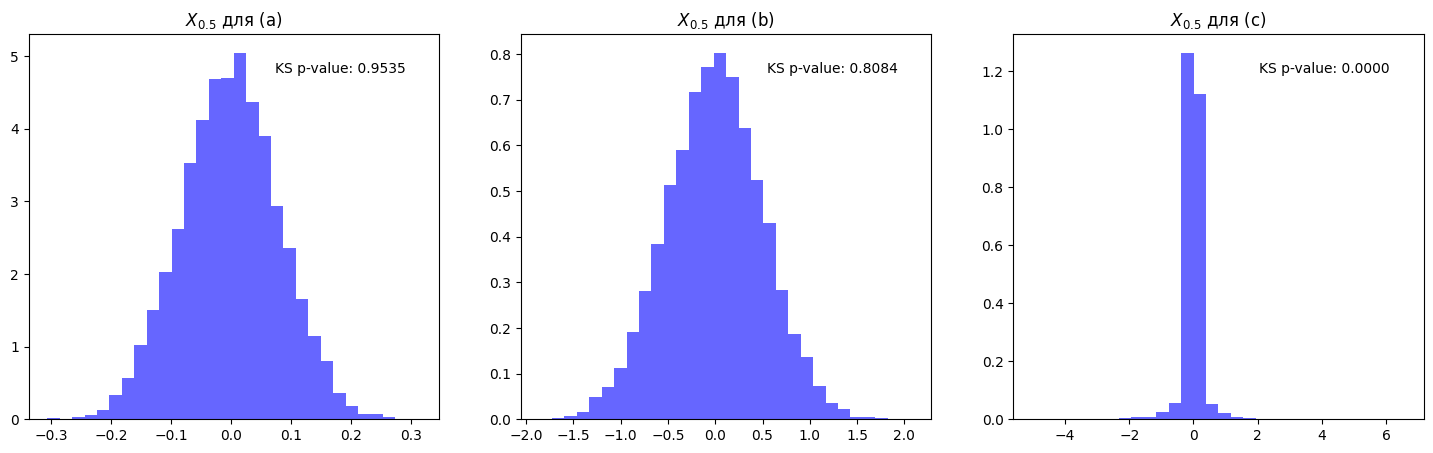

In [13]:
# Построение гистограмм и тест на нормальность для значений X_{0.5}
T_half_index = int(0.5 * num_steps)  # Индекс, соответствующий времени T = 0.5
X_half_a = Xt_a_process[:, T_half_index]  # Значения X_t для пункта (a) при T = 0.5
X_half_b = Xt_b_process[:, T_half_index]  # Значения X_t для пункта (b) при T = 0.5
X_half_c = Xt_c_process[:, T_half_index]  # Значения X_t для пункта (c) при T = 0.5

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Для каждого из трех процессов строим гистограмму и проводим тест на нормальность
for idx, X_half, title in zip(range(3), [X_half_a, X_half_b, X_half_c],
                              ["$X_{0.5}$ для (a)", "$X_{0.5}$ для (b)", "$X_{0.5}$ для (c)"]):
    axs[idx].hist(X_half, bins=30, density=True, alpha=0.6, color="blue")
    axs[idx].set_title(title)

    # Тест Колмогорова-Смирнова для нормальности распределения
    mu, std = norm.fit(X_half)  # Оценка параметров нормального распределения
    ks_stat, p_value = kstest(X_half, 'norm', args=(mu, std))  # Проводим тест
    axs[idx].text(0.6, 0.9, f"KS p-value: {p_value:.4f}", transform=axs[idx].transAxes)  # Выводим p-value

plt.show()